In [6]:
import sys
sys.path.append("..")

import sampling
import random
import torch
from models import graph_classifier, gnn_models
from torch_geometric.loader import DataLoader
import pandas as pd
from torch_geometric.datasets import TUDataset
import torch_geometric
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [19]:
dataset[0].x

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.]])

In [29]:
data_list = [torch_geometric.utils.to_networkx(data, to_undirected = True, node_attrs= ["x"]) for data in dataset]


print(data_list[5]

Graph with 17 nodes and 19 edges


In [24]:
# load some example dataset
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

dataset = dataset.shuffle()
# covnert the dataset to networkx 
dataset_nx = [torch_geometric.utils.to_networkx(data, to_undirected = True, node_attrs= ["x"]) for data in dataset] #np.array(


print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: MUTAG(188):
Number of graphs: 188
Number of features: 7
Number of classes: 2

Data(edge_index=[2, 28], x=[14, 7], edge_attr=[28, 4], y=[1])
Number of nodes: 14
Number of edges: 28
Average node degree: 2.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [25]:
train_mask = np.random.choice(np.arange(0, len(dataset)), size= int(len(dataset)*0.8), replace = False)
test_mask = np.delete(np.arange(0, len(dataset)), train_mask)


sampler = sampling.SubgraphSampler("rnn")

subgraph_node_num = 10

# create random samples 
all_graphs_torch  = []
all_graphs_nx  = []

for i, data in enumerate(dataset_nx[train_mask]):
    rs_0_nx, rs_0_torch = sampler.randomGeomSubgraphs(data, label = dataset[i].y.detach().numpy()[0], starts = 1, node_sample_size = subgraph_node_num)
    all_graphs_torch += rs_0_torch
    all_graphs_nx += rs_0_nx


random.shuffle(all_graphs_torch)

# split into training and test set
breaker = int(len(all_graphs_torch)*0.8)
train_dataset = all_graphs_torch[:breaker]
test_dataset = all_graphs_torch[breaker:]

TypeError: only integer scalar arrays can be converted to a scalar index

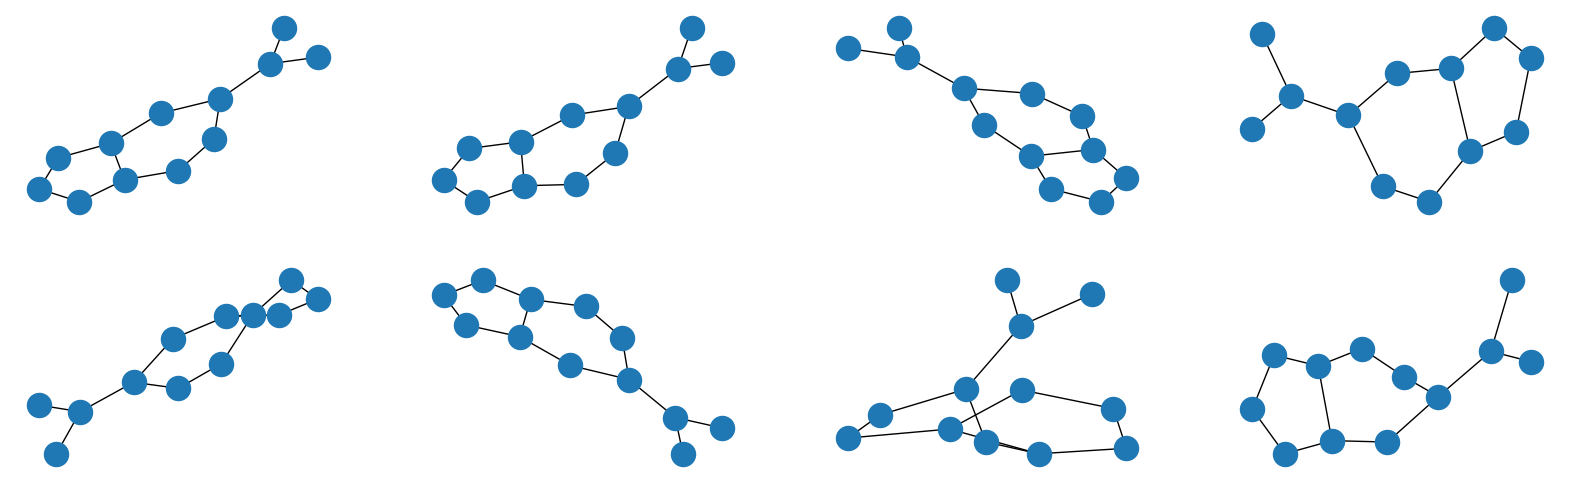

In [ ]:
fig, ax = plt.subplots(2,4, figsize = (20,6))
for i in range(2*4):
    row = i //4
    col = i %4
    nx.draw(dataset_nx[0],ax = ax[row,col])
    #nx.draw(all_graphs_nx[0],ax = ax[0,1])

In [ ]:
# selection of the features to use
num_features = dataset.num_features
num_classes = dataset.num_classes


# try different aggregation modes:
# other aggragtion schemas not supported for batches
from torch_geometric.nn import global_mean_pool, global_max_pool, global_add_pool


# create the model
model = gnn_models.GNN(in_channels= num_features, hidden_channels = 64,out_channels= num_classes, num_layers=1, dropout = 0.2, aggregation_mode= global_add_pool)

# create brach data loaders for training and test set
train_loader = DataLoader(dataset[train_mask], batch_size = 8, shuffle=True)
test_loader = DataLoader(dataset[test_mask], batch_size = 8, shuffle=False)


classifier = graph_classifier.graphClassifierBatch(model, train_loader, test_loader)
epochs = 500

for epoch in range(1, epochs+1):
    classifier.train()
    train_acc = classifier.test()
    test_acc = classifier.test()
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')



Epoch: 001, Train Acc: 0.5526, Test Acc: 0.5526
Epoch: 002, Train Acc: 0.5526, Test Acc: 0.5526
Epoch: 003, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 004, Train Acc: 0.6316, Test Acc: 0.6316
Epoch: 005, Train Acc: 0.5526, Test Acc: 0.5526
Epoch: 006, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 007, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 008, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 009, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 010, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 011, Train Acc: 0.7105, Test Acc: 0.7105
Epoch: 012, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 013, Train Acc: 0.6316, Test Acc: 0.6316
Epoch: 014, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 015, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 016, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 017, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 018, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 019, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 020, Train Acc: 0.5789, Test Acc: 0.5789
Epoch: 021, Train Acc: 0.8158, Test Acc: